In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys 
from pyhapke import *
from pyhapke.hapkeFuncs import *
import compute_phase_parameters_full

In [2]:
files = [
    "/Users/jordanando/Documents/Research/Li Group Research/Labwork/Notebooks/230524_Nina_Spectra_Highlands_Simulant_MEAN.csv"
    ]

g:  [1.00e-02 1.50e+01 3.00e+01 4.50e+01 6.00e+01 7.50e+01 9.00e+01 1.05e+02]
i:  [-45. -45. -45. -45. -45. -45. -45. -45.]
e:  [-44.99 -30.   -15.     0.    15.    30.    45.    60.  ]
[0.59667467 0.62228665 0.57758064 0.57361546 0.58892745 0.59035841
 0.61257711 0.58628396]
[0.59667467 0.62228665 0.57758064 0.57361546 0.58892745 0.59035841
 0.61257711 0.58628396]
[0.59667467 0.62228665 0.57758064 0.57361546 0.58892745 0.59035841
 0.61257711 0.58628396]
[0.59667465 0.62228663 0.57758063 0.57361544 0.58892744 0.5903584
 0.6125771  0.58628395]
[0.59666561 0.62228664 0.57758064 0.57361546 0.58892745 0.59035841
 0.61257711 0.58628396]
[0.59667467 0.62228665 0.57758064 0.57361546 0.58892745 0.59035841
 0.61257711 0.58628396]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4101e+00                                    3.63e+02    
[0.48233225 0.62192914 0.57741393 0.57350883 0.5888487  0.59029483
 0.61252237 0.586234

/Users/jordanando/opt/anaconda3/envs/geo-env/lib/python3.8/site-packages/scipy/optimize/_lsq/common.py:154: RuntimeWarning: invalid value encountered in scalar divide
  ratio = phi / phi_prime
/Users/jordanando/opt/anaconda3/envs/geo-env/lib/python3.8/site-packages/scipy/optimize/_lsq/common.py:398: RuntimeWarning: invalid value encountered in cast
  return min_step, np.equal(steps, min_step) * np.sign(s).astype(int)
/Users/jordanando/opt/anaconda3/envs/geo-env/lib/python3.8/site-packages/scipy/optimize/_lsq/trf.py:363: RuntimeWarning: divide by zero encountered in scalar divide
  alpha *= Delta / Delta_new
/Users/jordanando/opt/anaconda3/envs/geo-env/lib/python3.8/site-packages/scipy/optimize/_lsq/common.py:132: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_upper = norm(suf) / Delta


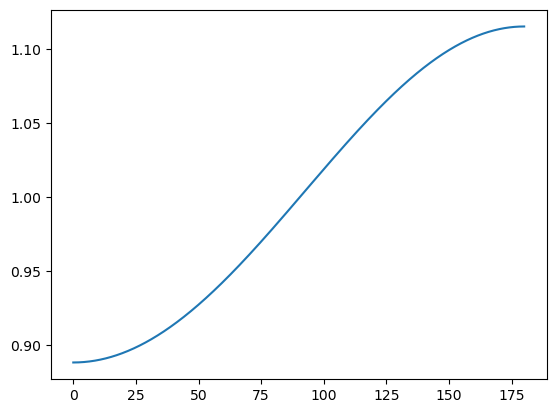

/Users/jordanando/Documents/Research/Li Group Research/Radiative Transfer Model Code/pyhapke/hapkeFuncs.py:19: RuntimeWarning: invalid value encountered in log
  Hinv = 1 - (1 - y) * x * (r0 + (1 - 0.5 * r0 - r0 * x) * np.log((1+x)/x))


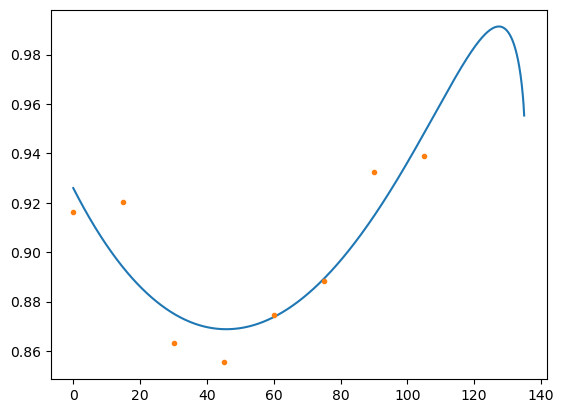

  0%|          | 0/150000 [00:00<?, ?it/s]/Users/jordanando/opt/anaconda3/envs/geo-env/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 150000/150000 [10:34<00:00, 236.55it/s]


[553.74747263 494.60913    507.52794398 358.21990653 311.05703233
 521.35975834]
(236800, 6)


\mathrm{b} = 0.087_{-0.052}^{0.125}


<IPython.core.display.Math object>

\mathrm{c} = -0.999_{-1.015}^{0.306}


<IPython.core.display.Math object>

\mathrm{w} = 0.997_{-0.002}^{0.001}


<IPython.core.display.Math object>

\mathrm{theta} = 0.732_{-0.345}^{0.207}


<IPython.core.display.Math object>

\mathrm{Bs0} = 0.708_{-0.327}^{0.206}


<IPython.core.display.Math object>

\mathrm{log(f)} = -3.777_{-0.309}^{0.366}


<IPython.core.display.Math object>

/Users/jordanando/Documents/Research/Li Group Research/Radiative Transfer Model Code/pyhapke/hapkeFuncs.py:19: RuntimeWarning: invalid value encountered in log
  Hinv = 1 - (1 - y) * x * (r0 + (1 - 0.5 * r0 - r0 * x) * np.log((1+x)/x))


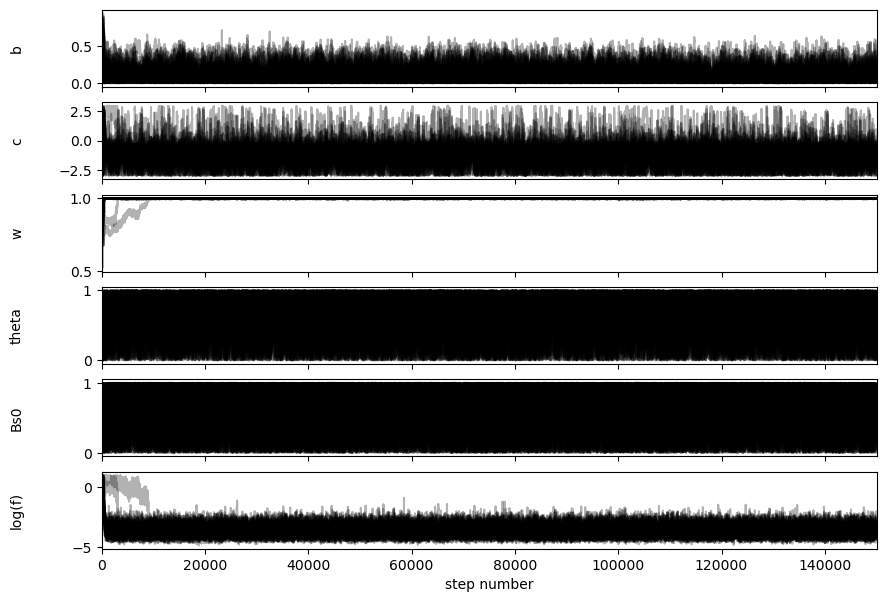

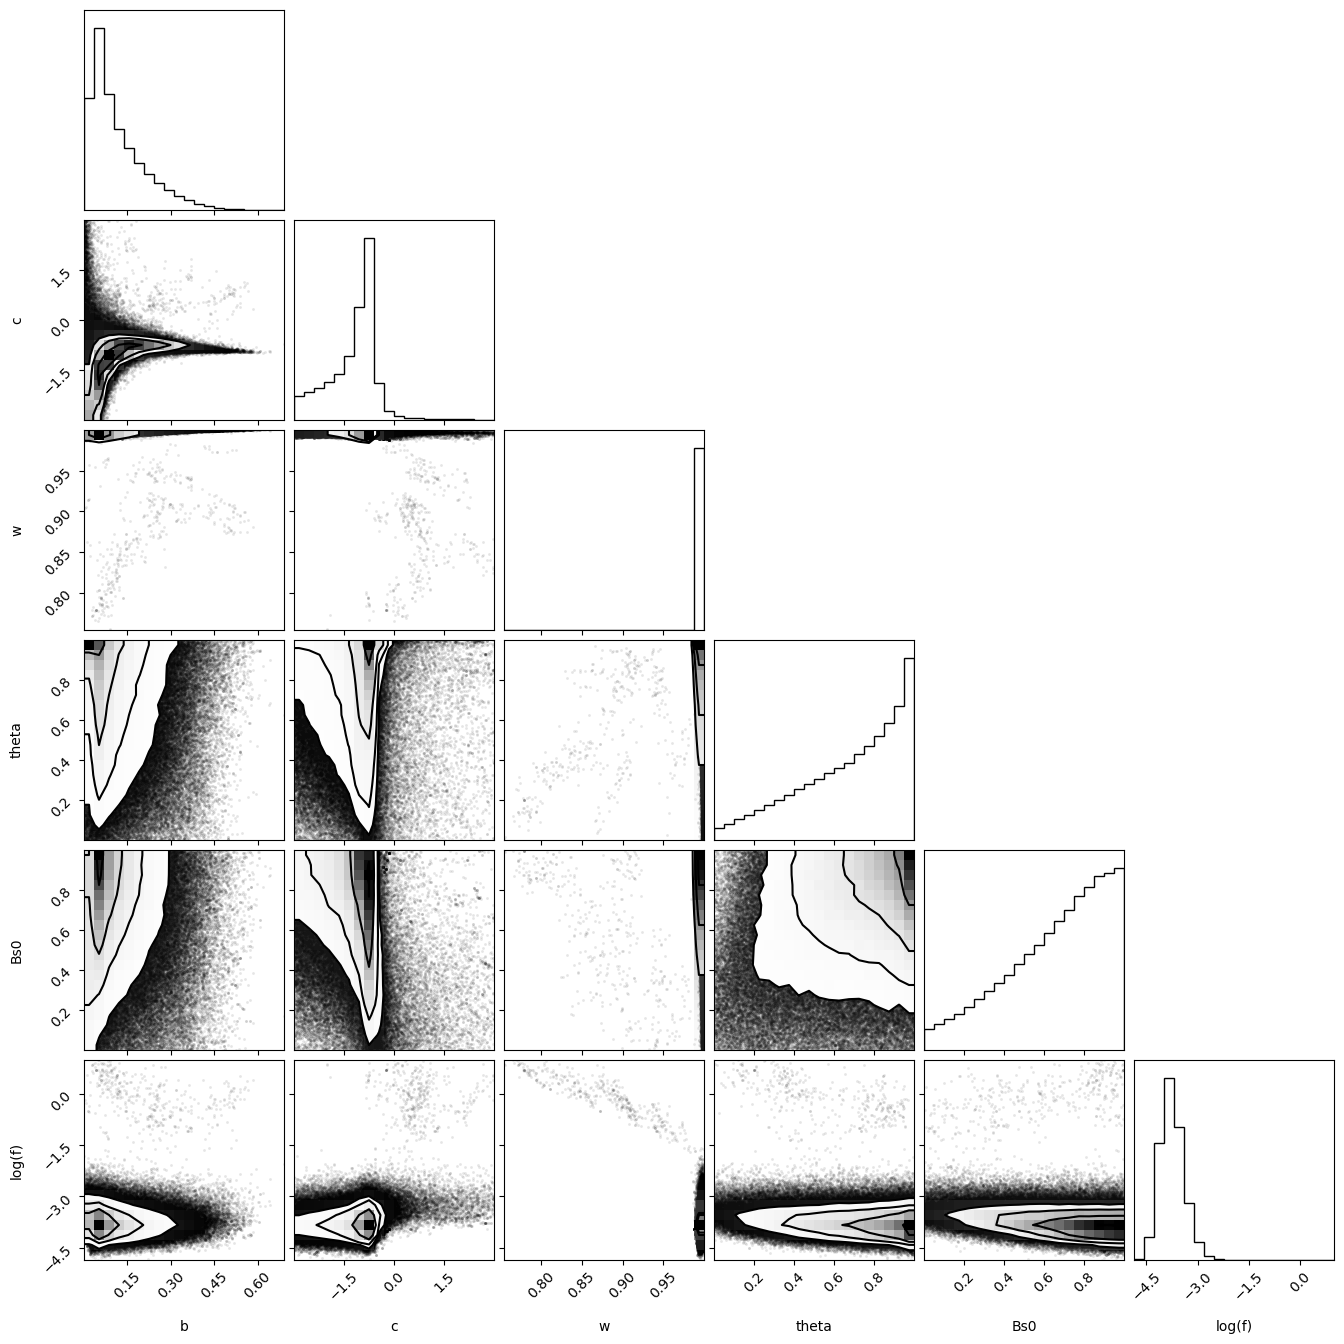

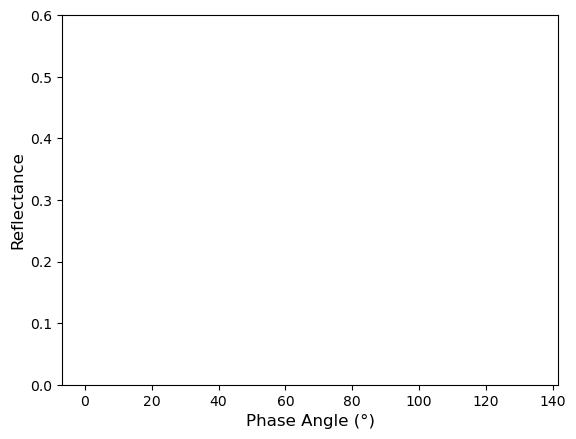

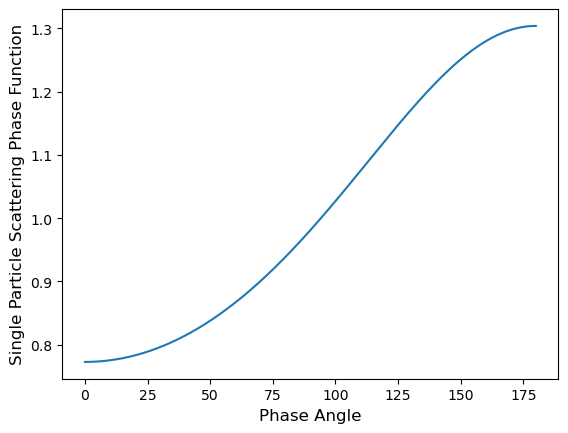

In [3]:
rows = []

for file in files:
    (fit, low_err, high_err) = compute_phase_parameters_full.compute_phase_parameters(file)

    file_ID = file[file.find("/23") + 1:file.find("Spectra")-1]

    rows.append([file_ID] + fit + low_err + high_err)

In [4]:
rows

[['230524_Nina',
  0.08708464059546124,
  -0.9988180234555734,
  0.9973481689336648,
  0.7322307672400787,
  0.7084945927920663,
  -3.7774289785902484,
  0.0520315770514867,
  1.0154964589923763,
  0.0019570124457302107,
  0.3447687214538883,
  0.32658042159051276,
  0.3086939501575383,
  0.12456837747800718,
  0.3056300708044567,
  0.0012110302469319212,
  0.20738153048584496,
  0.20569798633143133,
  0.3663471479992584]]

/Users/jordanando/Documents/Research/Li Group Research/Radiative Transfer Model Code/pyhapke/hapkeFuncs.py:19: RuntimeWarning: invalid value encountered in log
  Hinv = 1 - (1 - y) * x * (r0 + (1 - 0.5 * r0 - r0 * x) * np.log((1+x)/x))


Text(0, 0.5, 'Reflectance')

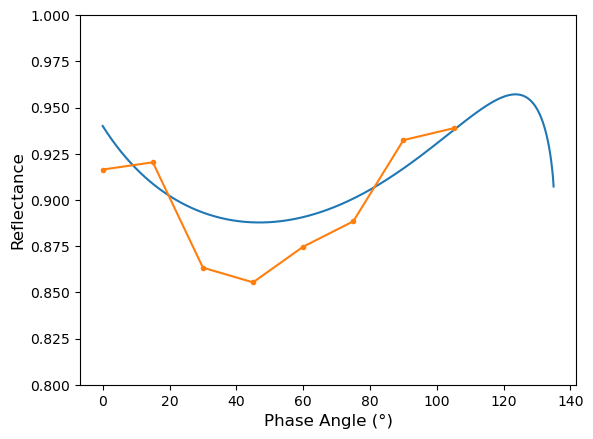

In [13]:
gs = np.linspace(0, np.pi, 1000)
i_rad = np.ones_like(gs) * -np.pi/4
e_rad = gs - np.pi/4

R_mod = []

P_arr = []


#print(e_rad * 180/np.pi)

for idx, g in enumerate(gs):
    P_sim = compute_P(g, rows[0][1],rows[0][2], format = "HenyeyGreenstein")
    P_arr.append(P_sim)

    model = HapkeRTM( i = i_rad[idx], e = e_rad[idx], g = g, P = P_sim, wl = None, poros =rows[0][5] , Bs0 = rows[0][4], Bc0 = 0)

    R_mod.append(model.hapke_function_REFF(rows[0][3]))


plt.figure()
plt.plot(gs * 180/np.pi, R_mod)

df_mean = pd.read_csv("/Users/jordanando/Documents/Research/Li Group Research/Labwork/Notebooks/230524_Nina_Spectra_Highlands_Simulant_MEAN.csv")
x = df_mean["Phase Angle"].to_numpy()
y = df_mean["700"].to_numpy()
yerr = df_mean["std"].to_numpy()

plt.errorbar(x, y, yerr = yerr, marker = '.')
plt.ylim(0.8, 1)
plt.xlabel("Phase Angle (°)")
plt.ylabel("Reflectance")

In [ ]:
col_names = ["File ID", "b", "c", "w", "poros", "Bs0", "logf", "b_lowerr", "c_lowerr", "w_lowerr", "poros_lowerr","Bs0_lowerr","logf_lowerr", 
             "b_higherr", "c_higherr", "w_higherr", "poros_higherr","Bs0_higherr","logf_higherr"]

df = pd.DataFrame(columns = col_names, data = rows)
df.to_excel("fit_params.xlsx")

In [ ]:
display(df)

In [ ]:
ids = df["File ID"]
bs = df['b']
cs = df['c']

gs = np.linspace(0, np.pi)

plt.figure()

for idx, id in enumerate(ids):

    b = bs[idx]
    c = cs[idx]

    P = compute_P(gs, bs[idx], cs[idx], format = "HenyeyGreenstein")
    plt.plot(gs * 180/np.pi, P, label = id[7:]+ ": b = " + str(np.round(b, 2)) + ", c = " + str(np.round(c,2)))

plt.xlabel("g")
plt.ylabel("REFF")
plt.legend()
plt.show()

In [ ]:
b_hock = np.linspace(0, 1, 1000)
c_hock = 3.29*np.exp(-17.4 * b_hock**2) - .908



plt.figure()


for idx, id in enumerate(ids):

    b = bs[idx]
    c = cs[idx]

    plt.errorbar(b, c, xerr = ([df["b_lowerr"][idx]], [df["b_higherr"][idx]]),yerr = ([df["c_lowerr"][idx]], [df["c_higherr"][idx]]), fmt = '.', label = id[7:])

plt.axhline(0, color = "black")

plt.plot(b_hock, c_hock, label = "Hockey Stick", color = "black")
plt.legend()

plt.xlabel("b")
plt.ylabel("c")